# Functions Definition

In [1]:
# Import libraries

import numpy as np
import pandas as pd

In [2]:
# Make functions for logistic regression model

## Sigmoid function
def sigmoid(z):
    """ z: ndarray of shape (m,1) """
    return 1 / (1 + np.exp(-z))
    
## Cost function
def costfunc(theta, X, y, lambd):
    """ theta: ndarray of shape (n,1)
        X: ndarray of shape (m,n)
        y: ndarray of shape (m,1)
        lambd: regularization strength
    """
    h = sigmoid(X.dot(theta))
    r = (lambd / (2 * len(y))) * np.sum(theta ** 2) # Regularization term
    return (1 / len(y)) * (- y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + r

## The derivative of cost function
def gradientfunc(theta, X, y, lambd):
    """ theta: ndarray of shape (n,1)
        X: ndarray of shape (m,n)
        y: ndarray of shape (m,1)
        lambd: regularization strength
    """
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    r = lambd * theta / m
    return ((1 / m) * X.T.dot(h - y)) + r
    
## Model training
def train(theta, X, y, lambd, num_iter, alpha):
    """ theta: ndarray of shape (n,1)
        X: ndarray of shape (m,n)
        y: ndarray of shape (m,1)
        lambd: regularization strength
        num_iter: number of iterations
        alpha: learning rate
    """
    cost_all = []
    for i in range(num_iter):
        # Calculating cost function of each iteration
        cost = costfunc(theta, X, y, lambd)
        cost_all.append(cost)
        # Applying gradient descent to find new theta
        drv = gradientfunc(theta, X, y, lambd) 
        theta = theta.reshape((X.shape[1], 1))
        theta = theta - alpha * drv    
    return theta, cost_all 

## Target prediction
def predict(theta, X):
    """ theta: ndarray of shape (n,1)
        X: ndarray of shape (m,n)
    """
    h = sigmoid(X.dot(theta))
    return h

## Accuracy calculation
def acc(y_pred, y_true):
    """ y_pred: ndarray of shape (m,1)
        y_true: ndarray of shape (m,1)
    """
    return (y_pred == y_true).mean()

# Data Pre-Processing

In [3]:
# Preview the summary of training data

df_train = pd.read_csv('Wine Recognition_Training Data.csv')
df_train.info()
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
alcohol                         142 non-null float64
malic_acid                      142 non-null float64
ash                             142 non-null float64
alcalinity_of_ash               142 non-null float64
magnesium                       142 non-null float64
total_phenols                   142 non-null float64
flavanoids                      142 non-null float64
nonflavanoid_phenols            142 non-null float64
proanthocyanins                 142 non-null float64
color_intensity                 142 non-null float64
hue                             142 non-null float64
od280/od315_of_diluted_wines    142 non-null float64
proline                         142 non-null float64
target                          142 non-null int64
dtypes: float64(13), int64(1)
memory usage: 15.6 KB


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.740,1.42,530.0,2
1,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1
2,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.650,2.00,855.0,2
3,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465.0,1
4,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.770,2.31,600.0,2
5,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.670,1.73,880.0,2
6,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.110,4.00,1035.0,0
7,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.570,1.96,660.0,2
8,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.890,3.53,760.0,0
9,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295.0,0


In [4]:
# Preview the summary of testing data

df_test = pd.read_csv('Wine Recognition_Testing Data.csv')
df_test.info()
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
alcohol                         36 non-null float64
malic_acid                      36 non-null float64
ash                             36 non-null float64
alcalinity_of_ash               36 non-null float64
magnesium                       36 non-null float64
total_phenols                   36 non-null float64
flavanoids                      36 non-null float64
nonflavanoid_phenols            36 non-null float64
proanthocyanins                 36 non-null float64
color_intensity                 36 non-null float64
hue                             36 non-null float64
od280/od315_of_diluted_wines    36 non-null float64
proline                         36 non-null float64
target                          36 non-null int64
dtypes: float64(13), int64(1)
memory usage: 4.0 KB


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0
1,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2
2,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0,1
3,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
4,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
5,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0
6,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1
7,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0
8,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406.0,1
9,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0


In [5]:
# Split the data into features and target

X_train = df_train.drop('target', axis = 1) # Training features
y_train = df_train['target'] # Training target
X_test = df_test.drop('target', axis = 1) # Testing features
y_test = df_test['target'] # Testing target

In [6]:
# Standardize training and testing features

std_train = X_train.std()
mean_train = X_train.mean()
X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train

# Model Training

In [7]:
# Train model

num_iter = 1000
alpha = 0.1
lambd = 1

t_pred_all = {} # Dictionary to save best theta for each label
pred_proba_train = {} # Dictionary to save target prediction for each label
cost_all = {} # Dictionary to save cost function at each iteration for each label

np.random.seed(14)

X_train = X_train.values

for label in np.unique(y_train): # Train model for each label in training target (One-vs-Rest Method)
    theta = np.random.normal(size = X_train.shape[1])
    y_train_label = y_train == label # Convert multiclass target into binary
    y_train_label = y_train_label.astype(int).values
    t_pred, cost = train(theta, X_train, y_train_label, lambd, num_iter, alpha) # Find best theta for each label
    t_pred_all[label] = t_pred
    cost_all[label] = cost
    y_train_pred = predict(t_pred, X_train)
    pred_proba_train[label] = y_train_pred.ravel().tolist()

pred_proba_train = pd.DataFrame(pred_proba_train)
y_train_pred = pred_proba_train.idxmax(axis = 1)
y_train_pred

0      2
1      1
2      2
3      1
4      2
5      2
6      0
7      2
8      0
9      0
10     0
11     0
12     2
13     2
14     0
15     0
16     0
17     0
18     1
19     1
20     1
21     0
22     1
23     2
24     1
25     0
26     1
27     1
28     2
29     2
      ..
112    0
113    0
114    1
115    0
116    1
117    0
118    1
119    0
120    1
121    1
122    0
123    2
124    1
125    0
126    2
127    2
128    0
129    0
130    0
131    2
132    1
133    1
134    2
135    2
136    1
137    1
138    2
139    0
140    1
141    1
Length: 142, dtype: int64

# Model Testing

In [8]:
# Test model

pred_proba_test = {} # Dictionary to save target prediction for each label

X_test = X_test.values

for label in pred_proba_train.columns:
    y_test_pred = predict(t_pred_all[label], X_test)
    pred_proba_test[label] = y_test_pred.ravel().tolist()

pred_proba_test = pd.DataFrame(pred_proba_test)
y_test_pred = pred_proba_test.idxmax(axis = 1)
y_test_pred

0     0
1     2
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    0
18    1
19    1
20    2
21    2
22    1
23    2
24    1
25    2
26    2
27    1
28    0
29    1
30    0
31    1
32    0
33    2
34    0
35    0
dtype: int64

# Model Evaluation

In [9]:
# Calculate training accuracy

acc(y_train_pred, y_train)

0.9859154929577465

In [10]:
# Calculate testing accuracy

acc(y_test_pred, y_test)

0.9722222222222222

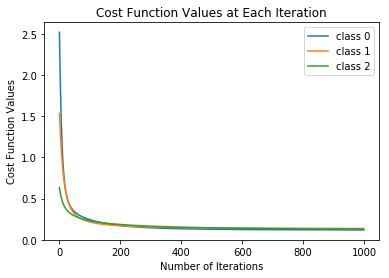

In [12]:
# Plot cost function

import matplotlib.pyplot as plt

for label, cost in cost_all.items():
    plt.plot(cost, label = 'class ' + str(label))

plt.legend()
plt.title('Cost Function Values at Each Iteration')
plt.ylabel('Cost Function Values')
plt.xlabel('Number of Iterations')
plt.show()